In [1]:
# Importing the libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
# Loading the datasets for prediction
boston = load_boston()
boston_frame = pd.DataFrame(boston.data)

boston_frame.columns = boston.feature_names
boston_frame['MEDV'] = boston.target
prices = boston_frame['MEDV']
features = boston_frame.columns

# Drop some features not needed for training the model
feature = boston_frame.drop(features[[0, 2, 3, 4, 9, 10, 11]], axis = 1, inplace = True)
boston_frame.head()

,ZN,RM,AGE,DIS,RAD,LSTAT,MEDV
0,18.0,6.575,65.2,4.0900,1.0,4.98,24.0
1,0.0,6.421,78.9,4.9671,2.0,9.14,21.6
2,0.0,7.185,61.1,4.9671,2.0,4.03,34.7
3,0.0,6.998,45.8,6.0622,3.0,2.94,33.4
4,0.0,7.147,54.2,6.0622,3.0,5.33,36.2


In [3]:
# checking for missing values
boston_frame.isnull().sum()

ZN       0
RM       0
AGE      0
DIS      0
RAD      0
LSTAT    0
MEDV     0
dtype: int64

In [4]:
# Calculating the minimum, maximum, mean, median and standard deviation of 'MEDV'(i.e prices) in boston
minimum_price = prices.min()
maximum_price = prices.max()
mean_price = prices.mean()
median_price = np.median(prices)
std_price = np.std(prices)


# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print(f"Minimum price: ${(minimum_price):.2f}")
print(f"Maximum price: ${(maximum_price):.2f}")
print(f"Mean price: ${(mean_price):.2f}")
print(f"Median price: ${(median_price):.2f}")
print(f"Standard Deviation of price: ${(std_price):.2f}")


Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price: $21.20
Standard Deviation of price: $9.19


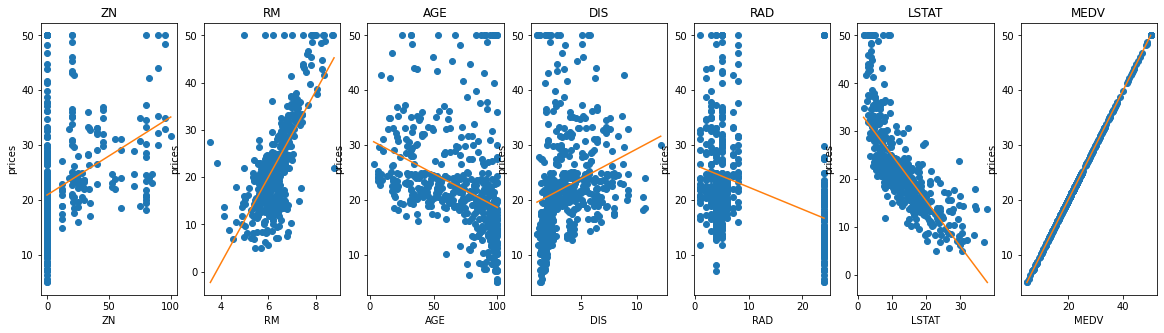

In [5]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(boston_frame.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 7, i+1)
    x = boston_frame[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')


In [6]:
target = prices
inputs = boston_frame.drop(['MEDV'], axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
# Data Normalization(i.e scaling the data usng standard scaler) so that fitting can be faster
# Create a scaler object 
scaler = StandardScaler()

# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler = scaler.fit(inputs)
# Scaling the features 
inputs_scaled = scaler.transform(inputs)

In [8]:
# Splitting model for training
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.25, random_state=0)

In [9]:
# Creating the Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import sys

# Creating the Linear Regression Object
reg = LinearRegression()

# Fitting the trained inputs and targets
reg.fit(x_train, y_train)
y_hat = reg.predict(x_train)
print('Standard Scaler: Regression Score:',reg.score(x_test,y_test), '\nR-Squared:',r2_score(y_train, y_hat))

Standard Scaler: Regression Score: 0.5521710045625193 
R-Squared: 0.705780186962849


In [10]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary # A positive weight shows that as a feature increases in value, so does the log_price

,Features,Weights
0,ZN,1.508390
1,RM,3.243343
2,AGE,-0.597400
3,DIS,-2.729449
4,RAD,-1.658113
5,LSTAT,-4.582858


In [11]:
# Scale The Data: MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(inputs)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, target, test_size=0.25, random_state=0)

In [13]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets

reg.fit(X_train,y_train)

print('MinMaxScaler: ',reg.score(X_test,y_test),r2_score(y_train, y_hat))

MinMaxScaler:  0.5521710045625197 0.705780186962849


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# create features
X = inputs
y = target

# Create a scaler object 
scaler = StandardScaler()

# Scale the values
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled,y,test_size=0.25, random_state=0)

# instantiate the model 
rfr_model = RandomForestRegressor(n_estimators=100)

rfr_model.fit(X_train,y_train)


RandomForestRegressor()

In [27]:
client = ['plots in ft', 'Number of rooms', 'Age', 'Distances to employment centres', 'accessibility to highways' ,'lower status of the population']
client_data = []
for feat in client:
    data = int(input(f"Enter the value for {feat}: "))
    client_data.append(data)
outcome = rfr_model.predict([client_data])
print(f"the selling price of the house is ${str(outcome*1000)[1:-1]}")

Enter the value for plots in ft: 100
Enter the value for Number of rooms: 100
Enter the value for Age: 100
Enter the value for Distances to employment centres: 100
Enter the value for accessibility to highways: 100
Enter the value for lower status of the population: 100
the selling price of the house is $20795.
